In [7]:
import numpy as np
import pandas as pd
from concurrent.futures import ProcessPoolExecutor
from model import MigrationModel

In [ ]:
# Define the range of annual immigration rates to sweep
immigration_rates = np.arange(50, 401, 50)  


In [ ]:
# Store results for analysis
results = []

for inflow in immigration_rates:
    # Set up parameters for this run
    params = {
        "number_locals": 1000,
        "number_migrants": 100,
        "annual_br_inflow": inflow,
        "local_birth_rate": 0.04,
        "migrant_birth_rate": 0.06,
        "num_school_interactions": 5,
        "num_workplace_interactions": 3,
        "prob_interaction_market": 0.3,
        "base_media_influence": 0.5,
        "vocab_influence_rate": 0.5,
        "grammar_influence_rate": 0.3,
        "pronoun_influence_rate": 0.25,
        "phonetic_influence_rate": 0.15,
        "simulation_years": 20,
        "reveal_share_locals": 0.3,
        "reveal_share_migrants":0.7
    }
    model = MigrationModel(params)
    model.setup()
    model.run(num_steps=20*12)  # 20 years, monthly steps

    # Get results
    data = model.get_results()
    # Example: get final migrant proportion and linguistic adoption
    final_locals = data["total_locals"][-1]
    final_migrants = data["total_migrants"][-1]
    migrant_prop = final_migrants / (final_locals + final_migrants)
    final_vocab = data["mean_local_vocab"][-1]
    results.append({
        "annual_br_inflow": inflow,
        "final_migrant_prop": migrant_prop,
        "final_local_vocab": final_vocab,
        # Add other features as needed
    })


Setting up model...
Created 1000 locals and 100 migrants
Distributed across 18 districts
Running simulation for 240 months (20.0 years)...
Year 1: 984 locals, 153 migrants
Year 2: 966 locals, 206 migrants
Year 3: 949 locals, 258 migrants
Year 4: 935 locals, 313 migrants
Year 5: 923 locals, 363 migrants
Year 6: 905 locals, 422 migrants
Year 7: 891 locals, 478 migrants
Year 8: 873 locals, 534 migrants
Year 9: 852 locals, 597 migrants
Year 10: 832 locals, 653 migrants
Year 11: 822 locals, 714 migrants
Year 12: 804 locals, 782 migrants
Year 13: 792 locals, 849 migrants
Year 14: 786 locals, 910 migrants
Year 15: 772 locals, 973 migrants
Year 16: 767 locals, 1030 migrants
Year 17: 752 locals, 1094 migrants
Year 18: 745 locals, 1155 migrants
Year 19: 740 locals, 1220 migrants
Year 20: 720 locals, 1284 migrants
Simulation complete!
Setting up model...
Created 1000 locals and 100 migrants
Distributed across 18 districts
Running simulation for 240 months (20.0 years)...
Year 1: 991 locals, 200 m

In [6]:
# Print or save results for analysis
for r in results:
    print(r)

{'annual_br_inflow': 50, 'final_migrant_prop': 0.6407185628742516, 'final_local_vocab': 49.97791597560897}
{'annual_br_inflow': 100, 'final_migrant_prop': 0.7757691087852838, 'final_local_vocab': 48.44938500811172}
{'annual_br_inflow': 150, 'final_migrant_prop': 0.835195530726257, 'final_local_vocab': 48.142396329198206}
{'annual_br_inflow': 200, 'final_migrant_prop': 0.8646216017634093, 'final_local_vocab': 42.9055076553335}
{'annual_br_inflow': 250, 'final_migrant_prop': 0.892607240644965, 'final_local_vocab': 40.961023755913956}
{'annual_br_inflow': 300, 'final_migrant_prop': 0.9093410028760786, 'final_local_vocab': 44.26636673618578}
{'annual_br_inflow': 350, 'final_migrant_prop': 0.9192017259978426, 'final_local_vocab': 45.726260948751694}
{'annual_br_inflow': 400, 'final_migrant_prop': 0.926399380205307, 'final_local_vocab': 46.65533871841281}


In [19]:
immigration_rates = np.arange(50, 101, 10)
def run_simulation(inflow):
    params = {
        "number_locals": 1000,
        "number_migrants": 100,
        "annual_br_inflow": inflow,
        "local_birth_rate": 0.04,
        "migrant_birth_rate": 0.06,
        "num_school_interactions": 5,
        "num_workplace_interactions": 3,
        "prob_interaction_market": 0.3,
        "base_media_influence": 0.5,
        "vocab_influence_rate": 0.5,
        "grammar_influence_rate": 0.3,
        "pronoun_influence_rate": 0.25,
        "phonetic_influence_rate": 0.15,
        "simulation_years": 20,
        "reveal_share_locals": 0.2,
        "reveal_share_migrants": 0.5
    }
    model = MigrationModel(params)
    model.setup()
    model.run(num_steps=20*12)
    data = model.get_results()
    final_locals = data["total_locals"][-1]
    final_migrants = data["total_migrants"][-1]
    migrant_prop = final_migrants / (final_locals + final_migrants)
    return {
        "annual_br_inflow": inflow,
        "final_migrant_prop": migrant_prop,
        "final_local_vocab": data["mean_local_vocab"][-1],
        "final_local_grammar": data["mean_local_grammar"][-1],
        "final_local_phonetics": data["mean_local_phonetics"][-1],
        "final_local_pronouns": data["mean_local_pronouns"][-1],
        "final_migrant_vocab": data["mean_migrant_vocab"][-1] if "mean_migrant_vocab" in data else None,
        "final_migrant_grammar": data["mean_migrant_grammar"][-1] if "mean_migrant_grammar" in data else None,
        "final_migrant_phonetics": data["mean_migrant_phonetics"][-1] if "mean_migrant_phonetics" in data else None,
        "final_migrant_pronouns": data["mean_migrant_pronouns"][-1] if "mean_migrant_pronouns" in data else None,
        "final_locals": final_locals,
        "final_migrants": final_migrants
    }


In [20]:
# Run in parallel
with ProcessPoolExecutor() as executor:
    results = list(executor.map(run_simulation, immigration_rates))


Setting up model...Setting up model...Setting up model...Setting up model...Setting up model...Setting up model...





Created 1000 locals and 100 migrantsCreated 1000 locals and 100 migrantsCreated 1000 locals and 100 migrants


Distributed across 18 districtsDistributed across 18 districtsDistributed across 18 districts

Created 1000 locals and 100 migrantsCreated 1000 locals and 100 migrantsCreated 1000 locals and 100 migrants
Running simulation for 240 months (20.0 years)...Running simulation for 240 months (20.0 years)...


Running simulation for 240 months (20.0 years)...

Distributed across 18 districtsDistributed across 18 districtsDistributed across 18 districts



Running simulation for 240 months (20.0 years)...Running simulation for 240 months (20.0 years)...Running simulation for 240 months (20.0 years)...


Year 1: 980 locals, 151 migrants
Year 1: 986 locals, 161 migrants
Year 1: 976 locals, 167 migrants
Year 1: 984 locals, 201 migrants
Year 1: 987 locals, 190 migrants
Y

In [23]:
# Convert to DataFrame and export
df = pd.DataFrame(results)
#df.to_csv("parameter_sweep_results.csv", index=False)
df

,annual_br_inflow,final_migrant_prop,final_local_vocab,final_local_grammar,final_local_phonetics,final_local_pronouns,final_migrant_vocab,final_migrant_grammar,final_migrant_phonetics,final_migrant_pronouns,final_locals,final_migrants
0,50,0.637062,40.423372,35.134174,21.103235,39.750561,93.480693,92.533750,91.217830,88.132965,756,1327
1,60,0.692610,44.969520,40.048259,24.560477,43.957734,93.840913,92.791664,91.355087,88.332678,703,1584
2,70,0.672525,41.584694,36.467132,21.609595,40.706467,93.822467,92.881426,91.487336,88.189776,764,1569
3,80,0.718413,43.970975,39.806108,25.230878,44.037709,94.309354,93.149632,91.529982,88.300312,731,1865
4,90,0.748428,45.387893,40.606859,24.961021,44.340401,94.492298,93.202374,91.529481,88.407304,720,2142
5,100,0.763240,42.856005,38.892566,24.833606,43.324939,94.818518,93.467428,91.504195,88.727318,760,2450


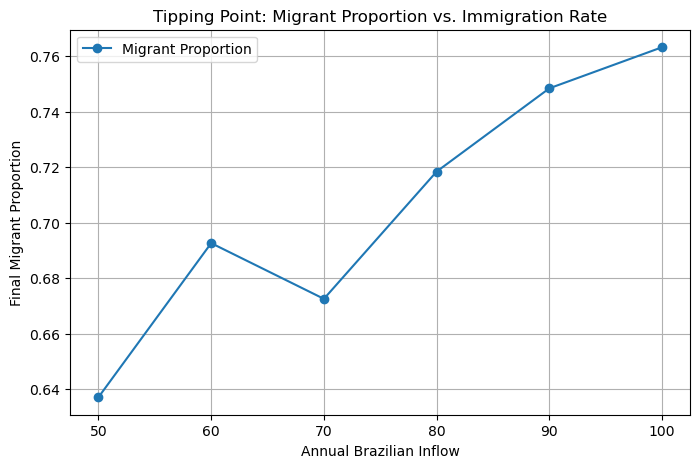

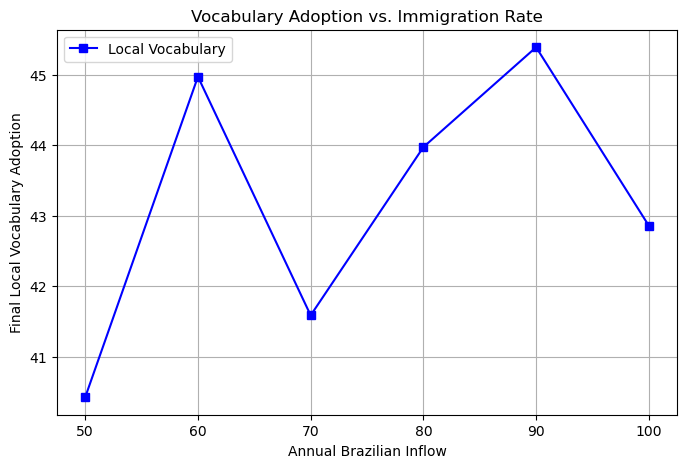

In [24]:
import matplotlib.pyplot as plt

# Plot final migrant proportion vs. annual inflow
plt.figure(figsize=(8,5))
plt.plot(df["annual_br_inflow"], df["final_migrant_prop"], marker='o', label="Migrant Proportion")
plt.xlabel("Annual Brazilian Inflow")
plt.ylabel("Final Migrant Proportion")
plt.title("Tipping Point: Migrant Proportion vs. Immigration Rate")
plt.grid(True)
plt.legend()
plt.savefig("AnnualInflow-vs-Features.png")
plt.show()

# Plot final local vocabulary adoption vs. annual inflow
plt.figure(figsize=(8,5))
plt.plot(df["annual_br_inflow"], df["final_local_vocab"], marker='s', color='b', label="Local Vocabulary")
plt.xlabel("Annual Brazilian Inflow")
plt.ylabel("Final Local Vocabulary Adoption")
plt.title("Vocabulary Adoption vs. Immigration Rate")
plt.grid(True)
plt.legend()
plt.show()

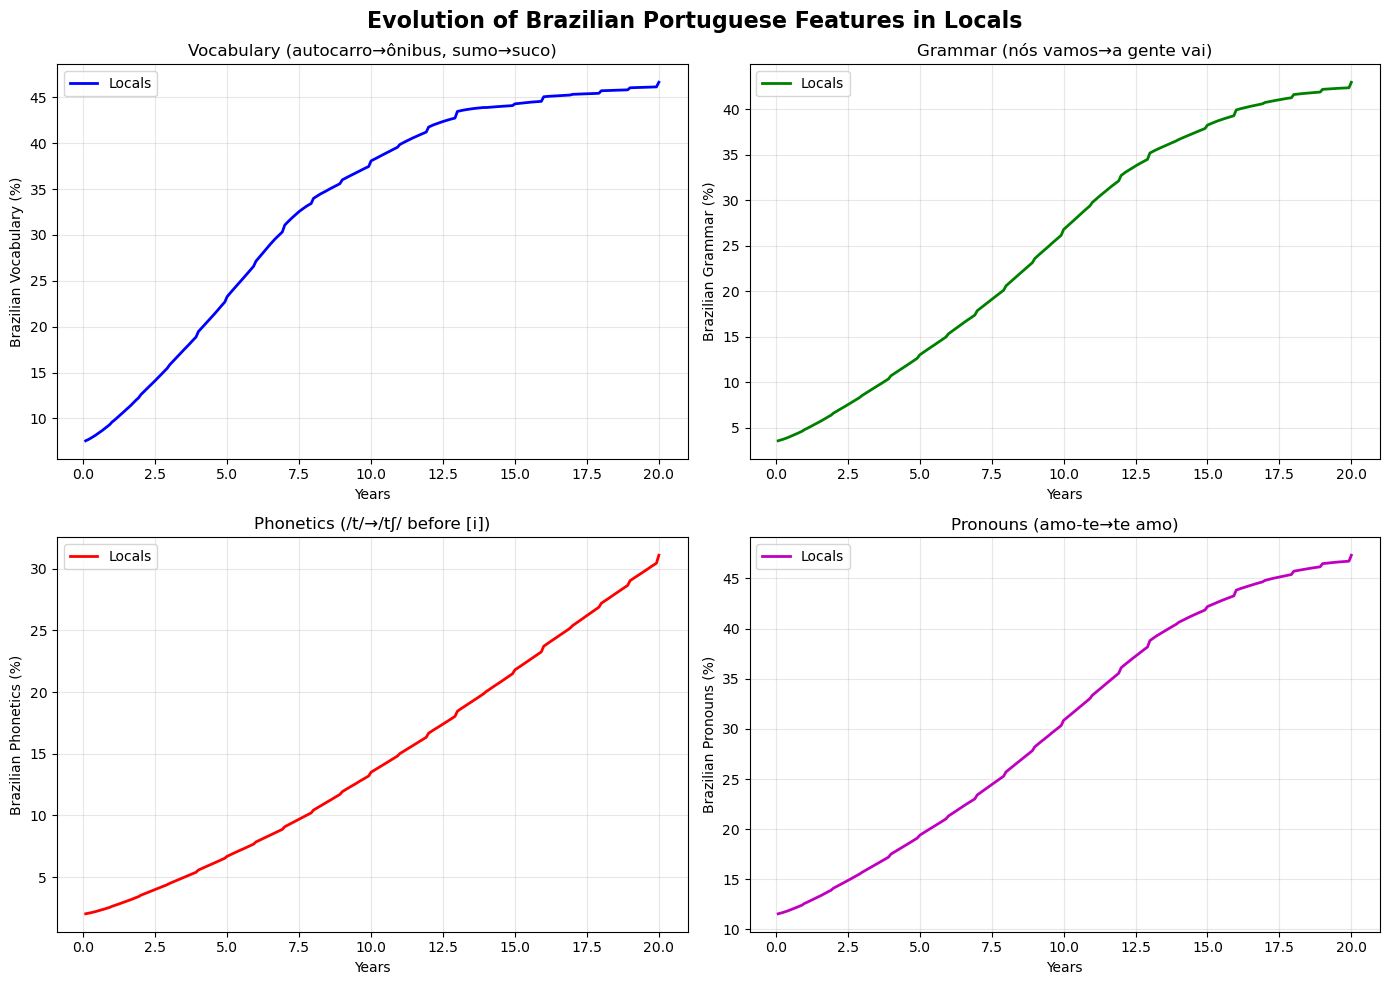

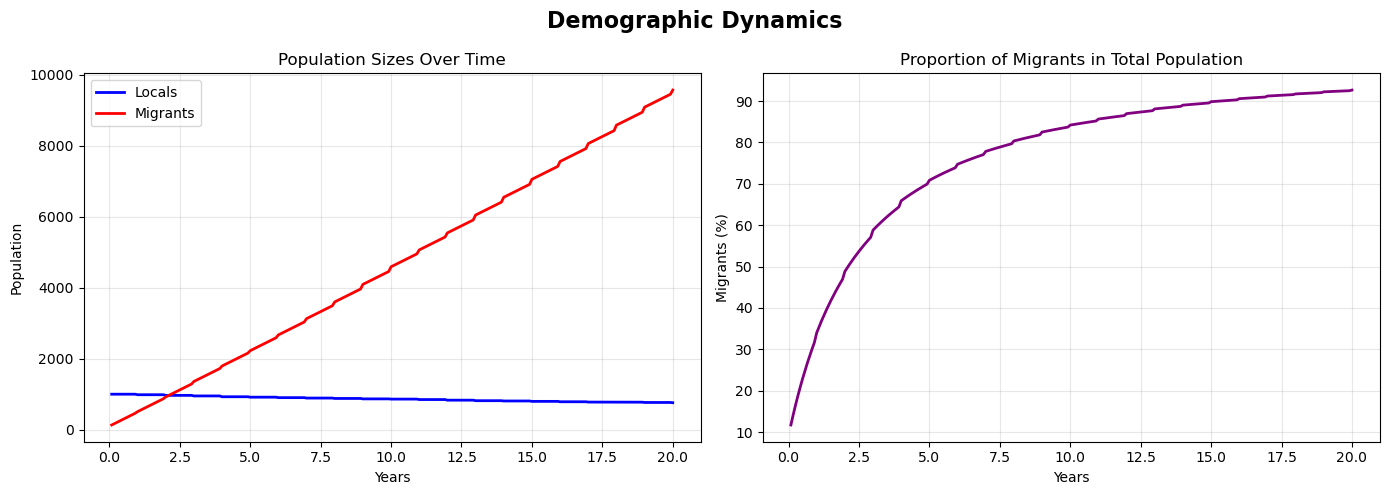

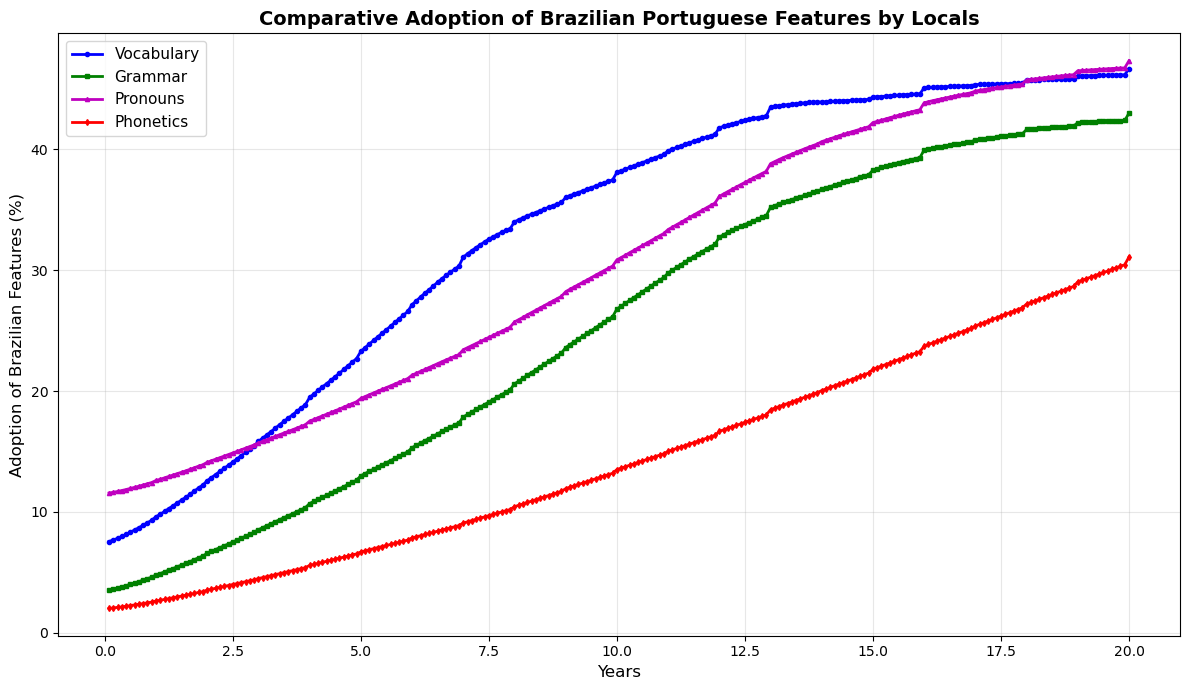

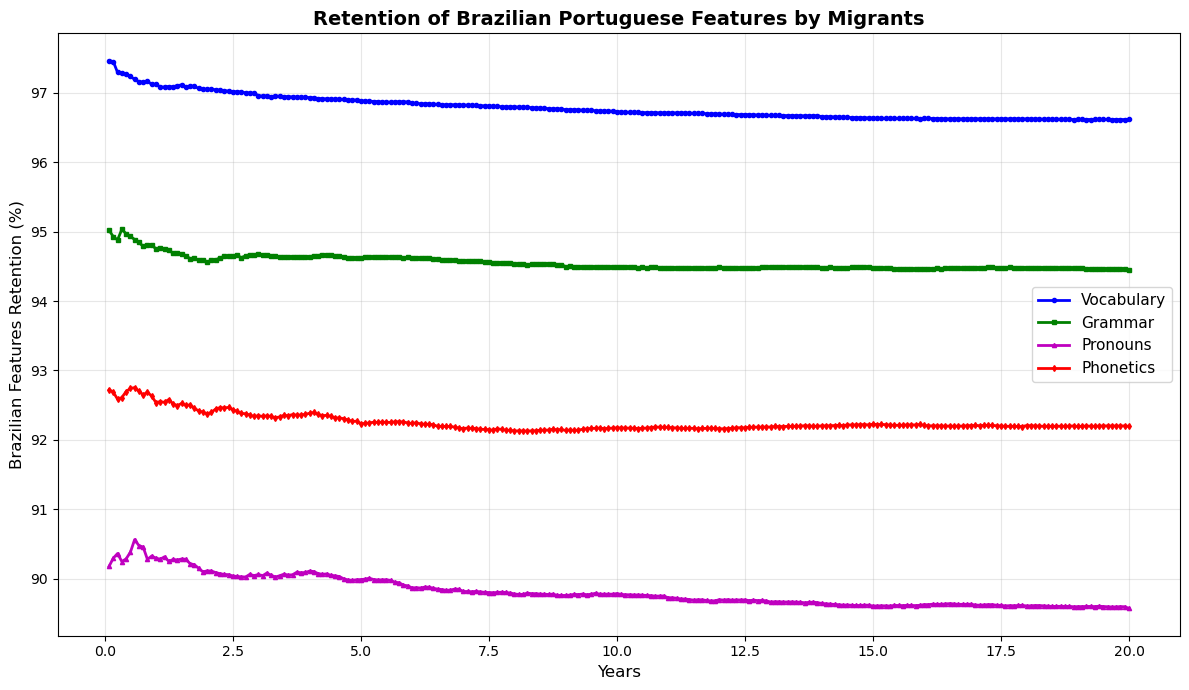

In [ ]:
from visualization import plot_linguistic_features, plot_demographics, plot_all_features_comparison, plot_migrant_features

# Plot linguistic features for locals
plot_linguistic_features(data)

# Plot demographic changes
plot_demographics(data)

# Plot all features together for locals
plot_all_features_comparison(data)

# Plot migrant feature retention
plot_migrant_features(data)

In [41]:
import numpy as np
import pandas as pd
from concurrent.futures import ProcessPoolExecutor
from model import MigrationModel

immigration_rates = np.arange(50, 401, 50)
n_repeats = 5  # Number of repetitions per rate

def run_simulation(inflow, seed=None):
    import random
    if seed is not None:
        np.random.seed(seed)
        random.seed(seed)
    params = {
        "number_locals": 1000,
        "number_migrants": 100,
        "annual_br_inflow": inflow,
        "local_birth_rate": 0.04,
        "migrant_birth_rate": 0.06,
        "num_school_interactions": 5,
        "num_workplace_interactions": 3,
        "prob_interaction_market": 0.3,
        "base_media_influence": 0.5,
        "vocab_influence_rate": 0.5,
        "grammar_influence_rate": 0.3,
        "pronoun_influence_rate": 0.25,
        "phonetic_influence_rate": 0.15,
        "simulation_years": 20,
        "reveal_share_locals": 0.3,
        "reveal_share_migrants": 0.7
    }
    model = MigrationModel(params)
    model.setup()
    model.run(num_steps=20*12)
    data = model.get_results()
    final_locals = data["total_locals"][-1]
    final_migrants = data["total_migrants"][-1]
    migrant_prop = final_migrants / (final_locals + final_migrants)
    return {
        "annual_br_inflow": inflow,
        "final_migrant_prop": migrant_prop,
        "final_local_vocab": data["mean_local_vocab"][-1],
        "final_local_grammar": data["mean_local_grammar"][-1],
        "final_local_phonetics": data["mean_local_phonetics"][-1],
        "final_local_pronouns": data["mean_local_pronouns"][-1],
        "final_migrant_vocab": data["mean_migrant_vocab"][-1] if "mean_migrant_vocab" in data else None,
        "final_migrant_grammar": data["mean_migrant_grammar"][-1] if "mean_migrant_grammar" in data else None,
        "final_migrant_phonetics": data["mean_migrant_phonetics"][-1] if "mean_migrant_phonetics" in data else None,
        "final_migrant_pronouns": data["mean_migrant_pronouns"][-1] if "mean_migrant_pronouns" in data else None,
        "final_locals": final_locals,
        "final_migrants": final_migrants
    }

# Prepare all jobs (rate, repeat, seed)
jobs = []
for inflow in immigration_rates:
    for rep in range(n_repeats):
        jobs.append((inflow, rep + 42))  # Use different seeds for reproducibility

# Run in parallel
def run_simulation_star(args):
    return run_simulation(*args)
    
with ProcessPoolExecutor() as executor:
    results = list(executor.map(run_simulation_star, jobs))

# Convert to DataFrame
df = pd.DataFrame(results)

# Aggregate statistics
agg = df.groupby("annual_br_inflow").agg(['mean', 'std'])
agg.columns = ['_'.join(col) for col in agg.columns]
agg.reset_index(inplace=True)
agg.to_csv("parameter_sweep_stats.csv", index=False)
agg

Setting up model...Setting up model...Setting up model...Setting up model...Setting up model...Setting up model...Setting up model...Setting up model...Setting up model...Setting up model...Setting up model...Setting up model...


Setting up model...
Setting up model...Setting up model...










Setting up model...Created 1000 locals and 100 migrantsCreated 1000 locals and 100 migrants
Created 1000 locals and 100 migrantsCreated 1000 locals and 100 migrants

Created 1000 locals and 100 migrants

Created 1000 locals and 100 migrantsCreated 1000 locals and 100 migrants
Created 1000 locals and 100 migrantsCreated 1000 locals and 100 migrantsDistributed across 18 districtsDistributed across 18 districts
Distributed across 18 districts

Created 1000 locals and 100 migrantsCreated 1000 locals and 100 migrantsDistributed across 18 districtsCreated 1000 locals and 100 migrantsCreated 1000 locals and 100 migrantsDistributed across 18 districts
Created 1000 locals and 100 migrants


Distribut

,annual_br_inflow,final_migrant_prop_mean,final_migrant_prop_std,final_local_vocab_mean,final_local_vocab_std,final_local_grammar_mean,final_local_grammar_std,final_local_phonetics_mean,final_local_phonetics_std,final_local_pronouns_mean,...,final_migrant_grammar_mean,final_migrant_grammar_std,final_migrant_phonetics_mean,final_migrant_phonetics_std,final_migrant_pronouns_mean,final_migrant_pronouns_std,final_locals_mean,final_locals_std,final_migrants_mean,final_migrants_std
0,50,0.631395,0.005831,43.598564,3.087828,39.489981,3.199742,30.078175,2.384927,44.050788,...,92.416647,0.094462,91.400445,0.221782,87.959835,0.185055,750.8,18.102486,1286.0,21.794495
1,100,0.769474,0.006107,43.644608,2.702215,39.795160,2.959080,33.235378,2.551277,44.421790,...,93.424418,0.106773,91.726464,0.106432,88.785267,0.046673,732.6,21.524405,2445.2,21.158922
2,150,0.830765,0.006494,43.584489,2.623663,39.795219,2.891493,34.402250,2.915297,44.428444,...,93.916463,0.101236,91.960703,0.135726,89.082299,0.179735,731.4,28.474550,3590.4,39.953723
3,200,0.864021,0.004048,43.602779,2.591901,39.863272,2.730775,34.950695,2.709176,44.494740,...,94.086696,0.115410,92.045366,0.090022,89.272951,0.125301,744.4,24.541801,4729.6,24.047869
4,250,0.887386,0.005151,44.285714,2.749764,40.503484,2.917856,35.793634,2.759107,45.103669,...,94.240424,0.073001,92.079988,0.070522,89.388772,0.088767,748.0,36.925601,5893.4,42.700117
5,300,0.908689,0.003372,43.464291,3.824490,39.715309,3.999752,35.439097,3.854250,44.388650,...,94.389481,0.056397,92.187874,0.026684,89.478371,0.051623,737.0,30.108138,7333.4,25.520580
6,350,0.919067,0.002518,44.149115,3.181892,40.336958,3.314104,35.949427,3.217265,44.925084,...,94.449379,0.045966,92.216880,0.082350,89.596072,0.090497,746.2,24.529574,8473.4,28.421823
7,400,0.928615,0.002079,43.818171,3.116979,40.105260,3.239984,36.039192,3.294466,44.736799,...,94.507361,0.044187,92.296010,0.026628,89.607531,0.115785,737.6,23.522330,9594.4,32.928711


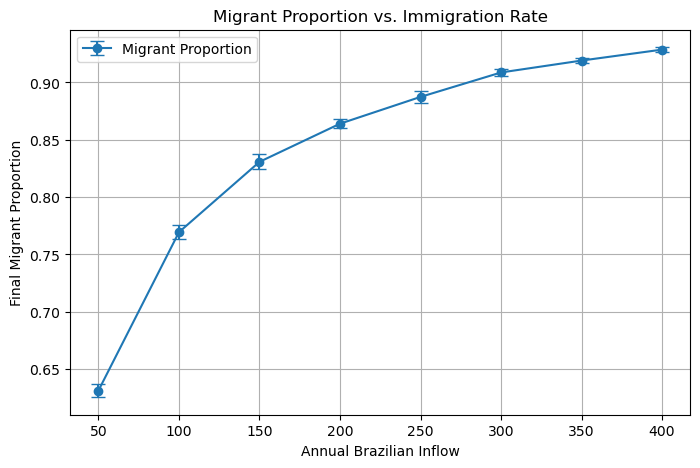

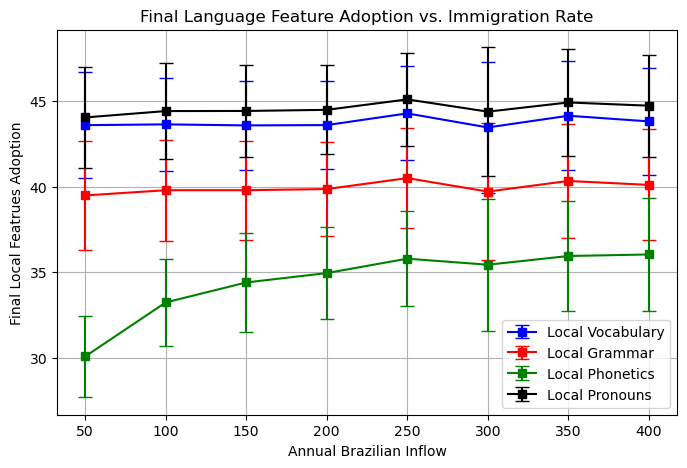

In [43]:
import matplotlib.pyplot as plt

# Plot final migrant proportion (mean ± std) vs. annual inflow
plt.figure(figsize=(8,5))
plt.errorbar(
    agg["annual_br_inflow"],
    agg["final_migrant_prop_mean"],
    yerr=agg["final_migrant_prop_std"],
    fmt='o-', capsize=5, label="Migrant Proportion"
)
plt.xlabel("Annual Brazilian Inflow")
plt.ylabel("Final Migrant Proportion")
plt.title("Migrant Proportion vs. Immigration Rate")
plt.grid(True)
plt.legend()
plt.show()

# Plot final local vocabulary adoption (mean ± std) vs. annual inflow
plt.figure(figsize=(8,5))
plt.errorbar(
    agg["annual_br_inflow"],
    agg["final_local_vocab_mean"],
    yerr=agg["final_local_vocab_std"],
    fmt='s-', capsize=5, color='b', label="Local Vocabulary"
)
plt.errorbar(
    agg["annual_br_inflow"],
    agg["final_local_grammar_mean"],
    yerr=agg["final_local_grammar_std"],
    fmt='s-', capsize=5, color='r', label="Local Grammar"
)
plt.errorbar(
    agg["annual_br_inflow"],
    agg["final_local_phonetics_mean"],
    yerr=agg["final_local_phonetics_std"],
    fmt='s-', capsize=5, color='g', label="Local Phonetics"
)

plt.errorbar(
    agg["annual_br_inflow"],
    agg["final_local_pronouns_mean"],
    yerr=agg["final_local_pronouns_std"],
    fmt='s-', capsize=5, color='k', label="Local Pronouns"
)

plt.xlabel("Annual Brazilian Inflow")
plt.ylabel("Final Local Featrues Adoption")
plt.title("Final Language Feature Adoption vs. Immigration Rate")
plt.grid(True)
plt.legend()
plt.show()

In [39]:
import numpy as np
import pandas as pd
from concurrent.futures import ProcessPoolExecutor
from model import MigrationModel

immigration_rates = np.arange(50, 401, 50)
immigration_rates = [120,240]
n_repeats = 20  # Number of repetitions per rate

def run_simulation(inflow, seed=None):
    import random
    if seed is not None:
        np.random.seed(seed)
        random.seed(seed)
    params = {
        "number_locals": 1000,
        "number_migrants": 100,
        "annual_br_inflow": inflow,
        "local_birth_rate": 0.04,
        "migrant_birth_rate": 0.06,
        "num_school_interactions": 5,
        "num_workplace_interactions": 3,
        "prob_interaction_market": 0.3,
        "base_media_influence": 0.5,
        "vocab_influence_rate": 0.5,
        "grammar_influence_rate": 0.3,
        "pronoun_influence_rate": 0.25,
        "phonetic_influence_rate": 0.15,
        "simulation_years": 20,
        "reveal_share_locals": 0.3,
        "reveal_share_migrants": 0.7
    }
    model = MigrationModel(params)
    model.setup()
    model.run(num_steps=20*12)
    data = model.get_results()
    final_locals = data["total_locals"][-1]
    final_migrants = data["total_migrants"][-1]
    migrant_prop = final_migrants / (final_locals + final_migrants)
    return {
        "annual_br_inflow": inflow,
        "final_migrant_prop": migrant_prop,
        "final_local_vocab": data["mean_local_vocab"][-1],
        "final_local_grammar": data["mean_local_grammar"][-1],
        "final_local_phonetics": data["mean_local_phonetics"][-1],
        "final_local_pronouns": data["mean_local_pronouns"][-1],
        "final_migrant_vocab": data["mean_migrant_vocab"][-1] if "mean_migrant_vocab" in data else None,
        "final_migrant_grammar": data["mean_migrant_grammar"][-1] if "mean_migrant_grammar" in data else None,
        "final_migrant_phonetics": data["mean_migrant_phonetics"][-1] if "mean_migrant_phonetics" in data else None,
        "final_migrant_pronouns": data["mean_migrant_pronouns"][-1] if "mean_migrant_pronouns" in data else None,
        "final_locals": final_locals,
        "final_migrants": final_migrants
    }

# Prepare all jobs (rate, repeat, seed)
jobs = []
for inflow in immigration_rates:
    for rep in range(n_repeats):
        jobs.append((inflow, rep + 42))  # Use different seeds for reproducibility

# Run in parallel (no lambda!)
def run_simulation_star(args):
    return run_simulation(*args)
    
with ProcessPoolExecutor() as executor:
    results = list(executor.map(run_simulation_star, jobs))

# Convert to DataFrame
df = pd.DataFrame(results)

# Aggregate statistics
agg = df.groupby("annual_br_inflow").agg(['mean', 'std'])
agg.columns = ['_'.join(col) for col in agg.columns]
agg.reset_index(inplace=True)
agg.to_csv("parameter_sweep_stats.csv", index=False)
agg               

Setting up model...Setting up model...Setting up model...Setting up model...Setting up model...Setting up model...Setting up model...Setting up model...Setting up model...Setting up model...Setting up model...Setting up model...Setting up model...Setting up model...






Setting up model...







Setting up model...
Created 1000 locals and 100 migrantsCreated 1000 locals and 100 migrantsCreated 1000 locals and 100 migrants

Created 1000 locals and 100 migrants
Created 1000 locals and 100 migrantsCreated 1000 locals and 100 migrantsCreated 1000 locals and 100 migrantsCreated 1000 locals and 100 migrantsDistributed across 18 districtsDistributed across 18 districtsCreated 1000 locals and 100 migrantsCreated 1000 locals and 100 migrants
Distributed across 18 districts




Created 1000 locals and 100 migrantsCreated 1000 locals and 100 migrants

Created 1000 locals and 100 migrants
Distributed across 18 districtsCreated 1000 locals and 100 migrantsDistributed across 18 districts
Distribu

,annual_br_inflow,final_migrant_prop_mean,final_migrant_prop_std,final_local_vocab_mean,final_local_vocab_std,final_local_grammar_mean,final_local_grammar_std,final_local_phonetics_mean,final_local_phonetics_std,final_local_pronouns_mean,...,final_migrant_grammar_mean,final_migrant_grammar_std,final_migrant_phonetics_mean,final_migrant_phonetics_std,final_migrant_pronouns_mean,final_migrant_pronouns_std,final_locals_mean,final_locals_std,final_migrants_mean,final_migrants_std
0,120,0.806292,0.004720,44.328184,2.843281,40.560337,2.959658,34.813594,2.329151,45.152358,...,93.702102,0.098370,91.840281,0.129833,88.898968,0.086734,723.30,18.987808,3010.60,27.161118
1,240,0.889267,0.003639,44.464426,2.728138,40.749299,2.863713,36.161715,2.557379,45.314684,...,94.254131,0.063919,92.111729,0.074786,89.388270,0.084542,732.95,25.373992,5885.95,49.336092


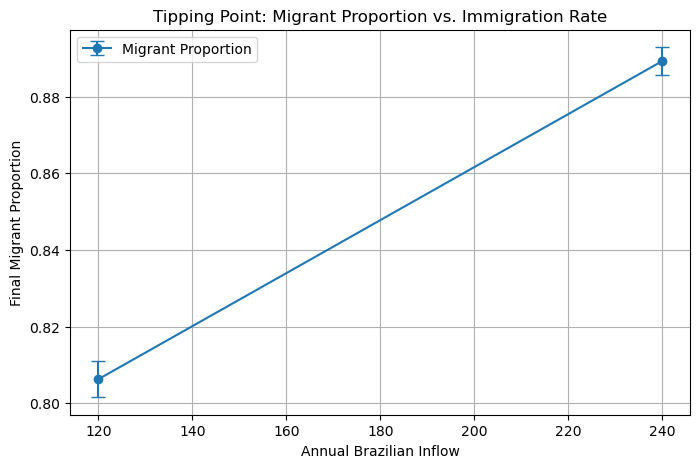

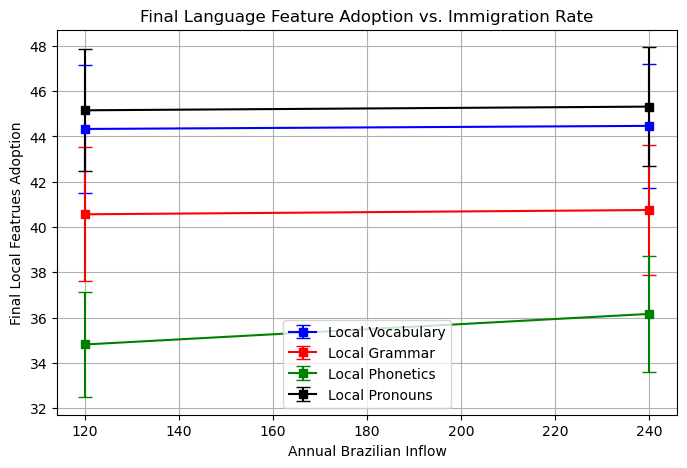

In [40]:
import matplotlib.pyplot as plt

# Plot final migrant proportion (mean ± std) vs. annual inflow
plt.figure(figsize=(8,5))
plt.errorbar(
    agg["annual_br_inflow"],
    agg["final_migrant_prop_mean"],
    yerr=agg["final_migrant_prop_std"],
    fmt='o-', capsize=5, label="Migrant Proportion"
)
plt.xlabel("Annual Brazilian Inflow")
plt.ylabel("Final Migrant Proportion")
plt.title("Tipping Point: Migrant Proportion vs. Immigration Rate")
plt.grid(True)
plt.legend()
plt.show()

# Plot final local vocabulary adoption (mean ± std) vs. annual inflow
plt.figure(figsize=(8,5))
plt.errorbar(
    agg["annual_br_inflow"],
    agg["final_local_vocab_mean"],
    yerr=agg["final_local_vocab_std"],
    fmt='s-', capsize=5, color='b', label="Local Vocabulary"
)
plt.errorbar(
    agg["annual_br_inflow"],
    agg["final_local_grammar_mean"],
    yerr=agg["final_local_grammar_std"],
    fmt='s-', capsize=5, color='r', label="Local Grammar"
)
plt.errorbar(
    agg["annual_br_inflow"],
    agg["final_local_phonetics_mean"],
    yerr=agg["final_local_phonetics_std"],
    fmt='s-', capsize=5, color='g', label="Local Phonetics"
)

plt.errorbar(
    agg["annual_br_inflow"],
    agg["final_local_pronouns_mean"],
    yerr=agg["final_local_pronouns_std"],
    fmt='s-', capsize=5, color='k', label="Local Pronouns"
)

plt.xlabel("Annual Brazilian Inflow")
plt.ylabel("Final Local Featrues Adoption")
plt.title("Final Language Feature Adoption vs. Immigration Rate")
plt.grid(True)
plt.legend()
plt.show()